In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv('placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [100]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [101]:
df.tail()

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
999,4.90,10.0,1


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [103]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [104]:
df.shape

(1000, 3)

In [105]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

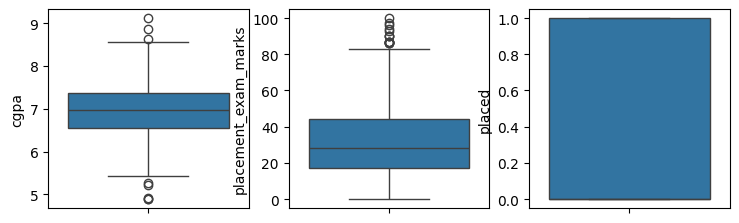

In [106]:
plt.figure(figsize = (15,15))
pltn = 1
for i in df.columns:
  if pltn <= 3:
    plt.subplot(5,5,pltn)
    sns.boxplot(df[i])
  pltn +=1
plt.show()

<ipython-input-107-cce7bc68b087>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-107-cce7bc68b087>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-107-cce7bc68b087>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn 

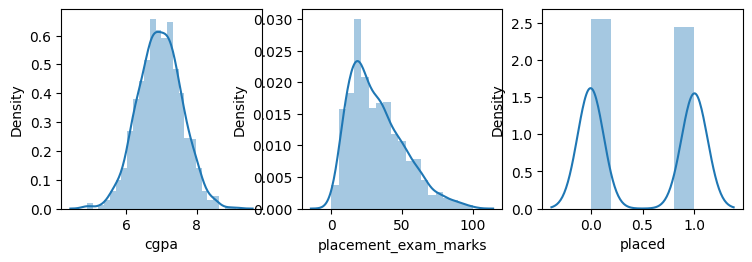

In [107]:
plt.figure(figsize = (15,15))
pltn = 1
for i in df.columns:
  if pltn <= 3:
    plt.subplot(5,5,pltn)
    sns.distplot(df[i])
  pltn +=1
plt.show()


In [108]:
df['placement_exam_marks'].skew()

0.8356419499466834

**Using Z score for outlier handling (NORMAL DISTRIBUTION)**

In [109]:
print('highest-allowed',df['cgpa'].mean()+3*df['cgpa'].std())
print('lowest-allowed',df['cgpa'].mean()-3*df['cgpa'].std())

highest-allowed 8.808933625397168
lowest-allowed 5.113546374602832


In [110]:
df[(df['cgpa']>8.80)| (df['cgpa']<5.11)]     #Based on the limits the observations are being picked by this condition

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [111]:
df1 =df.copy()

In [112]:
df1 = df[(df['cgpa']<8.80)&(df['cgpa']>5.11)]

In [113]:
df1.shape

(995, 3)

**Method-2 Z-score**

In [114]:
df['cgpa'].mean()

6.96124

In [115]:
df['z-score'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [116]:
df[(df['z-score']>3)|(df['z-score']<-3)]

,cgpa,placement_exam_marks,placed,z-score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [117]:
df2 = df.copy()
df2 =df[(df['z-score']<3)&(df['z-score']>-3)]
df2.shape

(995, 4)

**CAPPING ALSO USES EMPERICAL FORMULA**

In [118]:
highestallowed =df['cgpa'].mean()+3*df['cgpa'].std()
lowestallowed=df['cgpa'].mean()-3*df['cgpa'].std()

In [119]:
#df['cgpa'] = np.where(df['cgpa']<highestallowed,df['cgpa']>lowestallowed,df['cgpa'])
#df['cgpa']

**SKEWED DATA**

In [120]:
df.head()

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [122]:
df= df.drop('z-score',axis=1)

<ipython-input-123-263b2b25c19e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

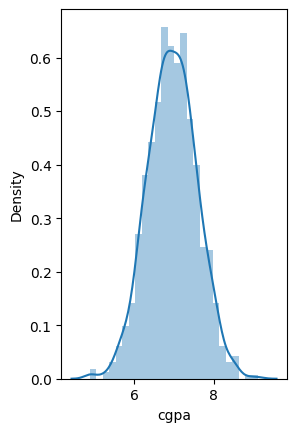

In [123]:
plt.subplot(1,2,1)#1-No of graph as in rows ,2-No of columns,1- index of the graph
sns.distplot(df['cgpa'])

**PERCENTILE METHOD/IQR METHOD**

In [129]:
q1 = df['placement_exam_marks'].quantile(.25)
q3 = df['placement_exam_marks'].quantile(.75)
q1,q3

(17.0, 44.0)

In [130]:
iqr = q3-q1
iqr

27.0

In [132]:
lowlimit = (q1-1.5*iqr)
upplimit = (q3+1.5*iqr)
lowlimit,upplimit

(-23.5, 84.5)

In [136]:
df[(df['placement_exam_marks']>upplimit) | (df['placement_exam_marks']<lowlimit)].count()

cgpa                    15
placement_exam_marks    15
placed                  15
dtype: int64

In [137]:
df3 = df.copy()

In [139]:
df3 =df[(df['placement_exam_marks']<upplimit) & (df['placement_exam_marks']>lowlimit)]
df3

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<ipython-input-146-28bb801d2cda>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-146-28bb801d2cda>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['placement_exam_marks'])


<Axes: ylabel='placement_exam_marks'>

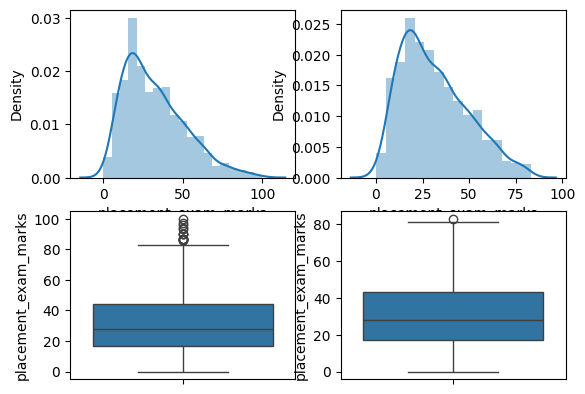

In [146]:
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.distplot(df3['placement_exam_marks'])
plt.subplot(2,2,3)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(df3['placement_exam_marks'])